# Fecha de entrega: 27/08/2022 (corresponde a clase 20)

# Algoritmo de clasificación: Logistic regression

# Diccionario

**BTC_pattern_indicators_fv**

- Date: fecha en YYYY-MM-DD (object)
- Close: precio de cierre de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- Open: precio de apertura de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- High: precio más alto de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- Low: precio más bajo de BTC en el día de la fecha (USD) (float) (Variable numérica continua)
- Vol.: volumen de BTC (Número de intercambios) en el día de la fecha (float) (Variable numérica continua)
- Percentage_diff: diferencia porcentual del precio de BTC en la fecha [x+1] con respecto a la fecha [x] (float) (Variable numérica continua) 
- Target: 1 indica que en el día de la fecha el precio de BTC subió, y 0 que el precio bajó (float) (Se la tratará como variable categórica)
- CDL3INSIDE: patrón 3 inside (hacia abajo/arriba) (-100, 0, 100) (int) (Funcionan como variable categórica)
- CDLADVANCEBLOCK: patrón advance block (hacia abajo/arriba) (-100, 0, 100) (int) (Funcionan como variable categórica)
- CDLBELTHOLD: patrón belt hold (hacia abajo/arriba) (-100, 0, 100) (int) (Funcionan como variable categórica)
- CDLCLOSINGMARUBOZU: patrón closing Marubozu (hacia abajo/arriba) (-100, 0, 100) (int) (Funcionan como variable categórica)
- CDLDOJISTAR: patrón doji star (hacia abajo/arriba) (-100, 0, 100) (int) (Funcionan como variable categórica)
- CDLENGULFING: patrón engulfing (hacia abajo/arriba) (-100, 0, 100) (int) (Funcionan como variable categórica)
- CDLHARAMI: patrón harami (hacia abajo/arriba) (-100, 0, 100) (int) (Funcionan como variable categórica)
- CDLHARAMICROSS: patrón harami cross (hacia abajo/arriba) (-100, 0, 100) (int) (Funcionan como variable categórica)
- CDLHIGHWAVE: patrón high wave (hacia abajo/arriba) (-100, 0, 100) (int) (Funcionan como variable categórica)
- CDLHIKKAKE: patrón Hikkake (hacia abajo/arriba) (-200, 0, 200) (int) (Funcionan como variable categórica)
- CDLLONGLINE: patrón long line (hacia abajo/arriba) (-100, 0, 100) (int) (Funcionan como variable categórica)
- CDLMARUBOZU: patrón Marubozu (hacia abajo/arriba) (-100, 0, 100) (int) (Funcionan como variable categórica)
- CDLMORNINGDOJISTAR: patrón morning doji star (hacia abajo/arriba) (-100, 0, 100) (int) (Funcionan como variable categórica)
- CDLSEPARATINGLINES: patrón separating lines (hacia abajo/arriba) (-100, 0, 100) (int) (Funcionan como variable categórica)
- CDLSHOOTINGSTAR: patrón shooting star (hacia abajo/arriba) (-100, 0, 100) (int) (Funcionan como variable categórica)
- CDLSHORTLINE: patrón shortline (hacia abajo/arriba) (-100, 0, 100) (int) (Funcionan como variable categórica)
- CDLSPINNINGTOP: patrón spinning top (hacia abajo/arriba) (-100, 0, 100) (int) (Funcionan como variable categórica)
- CDLXSIDEGAP3METHODS: downside/upside three methods (hacia abajo/arriba) (-100, 0, 100) (int) (Funcionan como variable categórica)

# Librerías

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas_profiling
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.cm import ScalarMappable

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('darkgrid')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

C:\Users\lucia\anaconda3\envs\acjup\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\lucia\anaconda3\envs\acjup\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# Data acquisition

In [2]:
def gdriveColabPath(sharing_url):
  file_id=sharing_url.split('/')[-2]
  dwn_url='https://drive.google.com/uc?id=' + file_id
  return dwn_url

## Adquiriendo BTC_pattern_indicators_fv

In [3]:
# Se carga la base de datos de BTC_pattern_indicators_fv desde la carpeta compartida en el Google Drive
sharing_url = "https://drive.google.com/file/d/1n4UTRL4N6ooD9tLl-fSFhuWMVA-OXxRK/view?usp=sharing"

In [4]:
dwn_url=gdriveColabPath(sharing_url)
BTC_pattern_indicators_fv_df = pd.read_csv(dwn_url, sep=";", decimal=".")
BTC_pattern_indicators_fv_df.head()

,date,close,open,high,low,vol,Percentage_diff,target,CDL3OUTSIDE,CDLADVANCEBLOCK,CDLBELTHOLD,CDLCLOSINGMARUBOZU,CDLDOJISTAR,CDLENGULFING,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLLONGLINE,CDLMARUBOZU,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLXSIDEGAP3METHODS,Trend,Residuals
0,2010-07-18,0.1,0.0,0.1,0.1,80.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,-19.575231
4,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,15.128694


# Data wrangling

## Análisis pre-modelado

In [5]:
# Registros y columnas
BTC_pattern_indicators_fv_df.shape

(4386, 27)

In [6]:
# Nombre de columnas
BTC_pattern_indicators_fv_df.columns

Index(['date', 'close', 'open', 'high', 'low', 'vol', 'Percentage_diff',
       'target', 'CDL3OUTSIDE', 'CDLADVANCEBLOCK', 'CDLBELTHOLD',
       'CDLCLOSINGMARUBOZU', 'CDLDOJISTAR', 'CDLENGULFING', 'CDLHARAMI',
       'CDLHARAMICROSS', 'CDLHIGHWAVE', 'CDLHIKKAKE', 'CDLLONGLINE',
       'CDLMARUBOZU', 'CDLSEPARATINGLINES', 'CDLSHOOTINGSTAR', 'CDLSHORTLINE',
       'CDLSPINNINGTOP', 'CDLXSIDEGAP3METHODS', 'Trend', 'Residuals'],
      dtype='object')

In [7]:
# Tipos de datos de las variables
BTC_pattern_indicators_fv_df.dtypes

date                    object
close                  float64
open                   float64
high                   float64
low                    float64
vol                    float64
Percentage_diff        float64
target                 float64
CDL3OUTSIDE              int64
CDLADVANCEBLOCK          int64
CDLBELTHOLD              int64
CDLCLOSINGMARUBOZU       int64
CDLDOJISTAR              int64
CDLENGULFING             int64
CDLHARAMI                int64
CDLHARAMICROSS           int64
CDLHIGHWAVE              int64
CDLHIKKAKE               int64
CDLLONGLINE              int64
CDLMARUBOZU              int64
CDLSEPARATINGLINES       int64
CDLSHOOTINGSTAR          int64
CDLSHORTLINE             int64
CDLSPINNINGTOP           int64
CDLXSIDEGAP3METHODS      int64
Trend                  float64
Residuals              float64
dtype: object

In [8]:
# Columnas y cantidad de registros
BTC_pattern_indicators_fv_df.count()

date                   4386
close                  4386
open                   4386
high                   4386
low                    4386
vol                    4386
Percentage_diff        4386
target                 4386
CDL3OUTSIDE            4386
CDLADVANCEBLOCK        4386
CDLBELTHOLD            4386
CDLCLOSINGMARUBOZU     4386
CDLDOJISTAR            4386
CDLENGULFING           4386
CDLHARAMI              4386
CDLHARAMICROSS         4386
CDLHIGHWAVE            4386
CDLHIKKAKE             4386
CDLLONGLINE            4386
CDLMARUBOZU            4386
CDLSEPARATINGLINES     4386
CDLSHOOTINGSTAR        4386
CDLSHORTLINE           4386
CDLSPINNINGTOP         4386
CDLXSIDEGAP3METHODS    4386
Trend                  4380
Residuals              4380
dtype: int64

In [9]:
# Valores NaN
BTC_pattern_indicators_fv_df.isnull().sum()

date                   0
close                  0
open                   0
high                   0
low                    0
vol                    0
Percentage_diff        0
target                 0
CDL3OUTSIDE            0
CDLADVANCEBLOCK        0
CDLBELTHOLD            0
CDLCLOSINGMARUBOZU     0
CDLDOJISTAR            0
CDLENGULFING           0
CDLHARAMI              0
CDLHARAMICROSS         0
CDLHIGHWAVE            0
CDLHIKKAKE             0
CDLLONGLINE            0
CDLMARUBOZU            0
CDLSEPARATINGLINES     0
CDLSHOOTINGSTAR        0
CDLSHORTLINE           0
CDLSPINNINGTOP         0
CDLXSIDEGAP3METHODS    0
Trend                  6
Residuals              6
dtype: int64

In [10]:
BTC_pattern_indicators_fv_df.head()

,date,close,open,high,low,vol,Percentage_diff,target,CDL3OUTSIDE,CDLADVANCEBLOCK,CDLBELTHOLD,CDLCLOSINGMARUBOZU,CDLDOJISTAR,CDLENGULFING,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLLONGLINE,CDLMARUBOZU,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLXSIDEGAP3METHODS,Trend,Residuals
0,2010-07-18,0.1,0.0,0.1,0.1,80.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,2010-07-19,0.1,0.1,0.1,0.1,570.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,2010-07-20,0.1,0.1,0.1,0.1,260.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,2010-07-21,0.1,0.1,0.1,0.1,580.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,-19.575231
4,2010-07-22,0.1,0.1,0.1,0.1,2160.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,15.128694


Observaciones:

Se observaron varios registros NaN en "BTC_pattern_indicators_fv.csv". 

Esto implica la necesidad de tomar una decisión con respecto a este tipo de valores (instancia previa al modelado). 

Se descarta rellenar los NaN con promedios de valores previos y/o posteriores por varias razones:

1. En las variables [Trend] y [Residuals], 3 de los 6 valores NaN se encuentran al principio de la serie, y los restantes 3 al final de la misma. Esto significa que no se puede hacer un promedio con valores anteriores y posteriores a los valores NaN sino solo con anteriores o posteriores según el caso. Proceder con un promedio con los datos anteriores o posteriores en una serie de tiempo supone un problema extra (¿cuántos valores hacia atrás o hacia adelante se deben tomar?, ¿cuál es el grado de autocorrelación con los valores anteriores o posteriores?, entre otros). 


2. En la variable [Residuals] hay valores positivos y negativos en los registros anteriores y posteriores inmediatos según el caso. Esto también añade un problema extra (¿qué signo se debería utilizar si se rellenan esos casilleros?).


3. Al no tratarse de un problema de regresión lineal del valor que tomaría el precio de BTC en el registro siguiente sino un problema de clasificación, la eliminación de los valores NaN no afectaría en demasía la predicción del modelo a pesar de la autocorrelación referida en el punto 2. Si se considera eliminar los 12 registros NaN (6 en [Residual] y 6 en [Trend] ) se estaría solamente eliminando un (6*100/4386 =) 0.136 % de los datos. 

Se eliminarán los valores NaN según lo dispuesto arriba. 

## Ultimas manipulaciones pre-modelado

Se reindexa el data set que se modelará a fin de que la variable [Date] funcione como nuevo índice de la base de datos.

In [11]:
# Se crea una copia de BTC_pattern_indicators_fv_df con nombre BTC_pattern y se la reindexa con la variable [Date] como nuevo índice
BTC_pattern = BTC_pattern_indicators_fv_df.set_index("date")

In [12]:
BTC_pattern.tail()

,close,open,high,low,vol,Percentage_diff,target,CDL3OUTSIDE,CDLADVANCEBLOCK,CDLBELTHOLD,CDLCLOSINGMARUBOZU,CDLDOJISTAR,CDLENGULFING,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLLONGLINE,CDLMARUBOZU,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLXSIDEGAP3METHODS,Trend,Residuals
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-16,21209.9,20825.2,21561.3,20484.4,136890.0,1.85,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21370.371429,-160.287691
2022-07-17,20785.6,21209.8,21654.4,20755.2,132810.0,-2.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,21784.528571,-994.949467
2022-07-18,22525.8,20785.6,22714.9,20770.6,279720.0,8.37,1.0,0,0,100,0,0,0,0,0,0,0,100,0,0,0,0,0,0,NaN,NaN
2022-07-19,23410.2,22529.3,23757.3,21581.8,308910.0,3.93,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2022-07-20,23149.1,23412.0,23429.9,22965.9,290210.0,-1.12,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-100,0,0,NaN,NaN


Dado que en la práctica real solo se tiene hasta los valores del registro anterior al que se quiere predecir se intenta hacer un shift (-1) a la variable [Target]. Se entiende que así (en caso de que el modelo prediga con previsibilidad suficiente) se podría estar seguro de que después vendría el valor de [Target] original sin shift (-1).

In [13]:
# Se genera un back up
BTC_pattern_2 = BTC_pattern.copy()

In [14]:
# Se realiza el shift 
BTC_pattern_2 ["target"] = BTC_pattern ["target"].shift(-1)

In [15]:
BTC_pattern_2.tail()

,close,open,high,low,vol,Percentage_diff,target,CDL3OUTSIDE,CDLADVANCEBLOCK,CDLBELTHOLD,CDLCLOSINGMARUBOZU,CDLDOJISTAR,CDLENGULFING,CDLHARAMI,CDLHARAMICROSS,CDLHIGHWAVE,CDLHIKKAKE,CDLLONGLINE,CDLMARUBOZU,CDLSEPARATINGLINES,CDLSHOOTINGSTAR,CDLSHORTLINE,CDLSPINNINGTOP,CDLXSIDEGAP3METHODS,Trend,Residuals
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-16,21209.9,20825.2,21561.3,20484.4,136890.0,1.85,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21370.371429,-160.287691
2022-07-17,20785.6,21209.8,21654.4,20755.2,132810.0,-2.00,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,21784.528571,-994.949467
2022-07-18,22525.8,20785.6,22714.9,20770.6,279720.0,8.37,1.0,0,0,100,0,0,0,0,0,0,0,100,0,0,0,0,0,0,NaN,NaN
2022-07-19,23410.2,22529.3,23757.3,21581.8,308910.0,3.93,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2022-07-20,23149.1,23412.0,23429.9,22965.9,290210.0,-1.12,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-100,0,0,NaN,NaN


Se elimina el registro NaN de la variable [Target] dado que los modelos no pueden procesar este tipo de datos

In [16]:
BTC_pattern_2 = BTC_pattern_2 [0:4385]

In [17]:
BTC_pattern_2.isnull().sum()

close                  0
open                   0
high                   0
low                    0
vol                    0
Percentage_diff        0
target                 0
CDL3OUTSIDE            0
CDLADVANCEBLOCK        0
CDLBELTHOLD            0
CDLCLOSINGMARUBOZU     0
CDLDOJISTAR            0
CDLENGULFING           0
CDLHARAMI              0
CDLHARAMICROSS         0
CDLHIGHWAVE            0
CDLHIKKAKE             0
CDLLONGLINE            0
CDLMARUBOZU            0
CDLSEPARATINGLINES     0
CDLSHOOTINGSTAR        0
CDLSHORTLINE           0
CDLSPINNINGTOP         0
CDLXSIDEGAP3METHODS    0
Trend                  5
Residuals              5
dtype: int64

Se eliminan los valores NaN del resto de las columnas.

In [18]:
BTC_pattern_2 = BTC_pattern_2.dropna()

In [19]:
BTC_pattern_2.isnull().sum()

close                  0
open                   0
high                   0
low                    0
vol                    0
Percentage_diff        0
target                 0
CDL3OUTSIDE            0
CDLADVANCEBLOCK        0
CDLBELTHOLD            0
CDLCLOSINGMARUBOZU     0
CDLDOJISTAR            0
CDLENGULFING           0
CDLHARAMI              0
CDLHARAMICROSS         0
CDLHIGHWAVE            0
CDLHIKKAKE             0
CDLLONGLINE            0
CDLMARUBOZU            0
CDLSEPARATINGLINES     0
CDLSHOOTINGSTAR        0
CDLSHORTLINE           0
CDLSPINNINGTOP         0
CDLXSIDEGAP3METHODS    0
Trend                  0
Residuals              0
dtype: int64

In [20]:
BTC_pattern_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4380 entries, 2010-07-21 to 2022-07-17
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   close                4380 non-null   float64
 1   open                 4380 non-null   float64
 2   high                 4380 non-null   float64
 3   low                  4380 non-null   float64
 4   vol                  4380 non-null   float64
 5   Percentage_diff      4380 non-null   float64
 6   target               4380 non-null   float64
 7   CDL3OUTSIDE          4380 non-null   int64  
 8   CDLADVANCEBLOCK      4380 non-null   int64  
 9   CDLBELTHOLD          4380 non-null   int64  
 10  CDLCLOSINGMARUBOZU   4380 non-null   int64  
 11  CDLDOJISTAR          4380 non-null   int64  
 12  CDLENGULFING         4380 non-null   int64  
 13  CDLHARAMI            4380 non-null   int64  
 14  CDLHARAMICROSS       4380 non-null   int64  
 15  CDLHIGHWAVE          4380 no

# Modelado (Logistic regression)

**...Recordando que...**

*Objetivo general del proyecto*

I.	Diseñar diversos modelos de machine learning capaces de predecir con cierto grado de previsibilidad positiva (>50/55%) el dinamismo del precio de Bitcoin en el corto plazo, es decir, si el precio de este criptoactivo subirá o bajará en la temporalidad estudiada (1 día).

**...Recordando que...**

*Objetivo específico del proyecto*

III.	Diseñar diversos modelos de machine learning capaces de predecir con cierto grado de previsibilidad positiva (>50/55%) y a corto plazo, el movimiento alcista o bajista del precio de BTC.

**Explicación**:

En lo que sigue se procederá a realizar varios modelos supervisados de clasificación de tipo "Logistic Regression". 

Estos serán configurados con diversos hiperparámetros a fin de encontrar el resultado más óptimo para este data set.

La variable target del modelo es la columna [Target] de BTC_pattern_2.

## Modelo 1

In [21]:
# Se generan las variables X e y (target)
X = BTC_pattern_2.drop (["target"], axis=1)
y = BTC_pattern_2 ["target"].values.reshape(-1,1)

In [22]:
# Se escalan los datos

escalador = MinMaxScaler()

X = escalador.fit_transform(X)

y= escalador.fit_transform(y)

In [23]:
# Se separa la data en train y test
# Se decide aplicar stratify
(X_train, X_test, y_train, y_test) = train_test_split(X, y,
                                        stratify=y,
                                        test_size=0.3,
                                        random_state=11)

In [24]:
# Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()

In [25]:
# Entrenamos la regresión logística con los datos de entrenamiento
regresion_logistica.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_train_pred = regresion_logistica.predict(X_train) 
train_accuracy = accuracy_score(y_train, y_train_pred)

print('% de aciertos sobre el set de entrenamiento:',train_accuracy)

y_test_pred = regresion_logistica.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación es:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.6033920417482062
% de aciertos sobre el set de evaluación es: 0.6255707762557078


[[551 127]
 [365 271]]


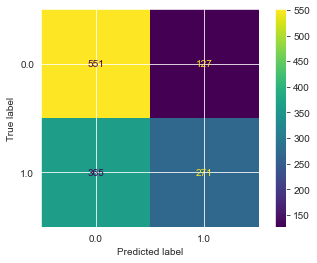

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Predicciones
predictions = regresion_logistica.predict(X_test)

#Matriz de Confusión
print(confusion_matrix(y_test, predictions))

#Ploteamos la Matriz
plot_confusion_matrix(regresion_logistica, X_test, y_test)
plt.show()

Observaciones:
- Al modelo le cuesta predecir valores positivos y negativos (los falsos positivos y negativos son altos en comparación con los verdaderos positivos y negativos).

Accuracy of the classifier is: 0.6255707762557078
Precision Score of the classifier is: 0.6809045226130653
Recall Score of the classifier is: 0.4261006289308176
F1 Score of the classifier is: 0.5241779497098646
AUC for our classifier is: 0.6661727055156677


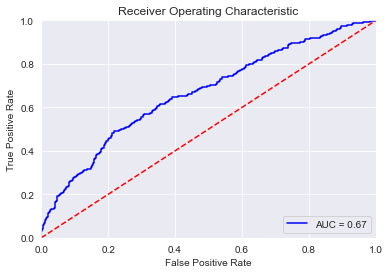

In [28]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = regresion_logistica.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Hypertuning

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
# parameter grid
parameters = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 
    'C'       : [0.0001,0.001,0.01,0.1,1,10,100, 1000],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
    'class_weight': ['balanced'],
    'random_state': np.arange(1,10000,100),
    'warm_start':[False, True]
}

In [31]:
from sklearn.model_selection import RandomizedSearchCV
regresion_logistica = LogisticRegression()
regresion_logistica = RandomizedSearchCV(regresion_logistica,
                   parameters,  
                   scoring='accuracy',        
                   cv=5, verbose=2, n_iter=100)

In [32]:
regresion_logistica.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END C=0.1, class_weight=balanced, penalty=elasticnet, random_state=2101, solver=liblinear, warm_start=False; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, penalty=elasticnet, random_state=2101, solver=liblinear, warm_start=False; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, penalty=elasticnet, random_state=2101, solver=liblinear, warm_start=False; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, penalty=elasticnet, random_state=2101, solver=liblinear, warm_start=False; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, penalty=elasticnet, random_state=2101, solver=liblinear, warm_start=False; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, penalty=l1, random_state=9001, solver=newton-cg, warm_start=False; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, penalty=l1, random_state=9001, solver=newton-cg, warm_start=False; total time=   0.0s
[CV] END C=0.01, cla

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000],
                                        'class_weight': ['balanced'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'random_state': array([   1,  101,  201,  301,  401,  501,  601,  701,  801,  901, 1001,
       1101, 1201, 1301, 1401, 1501, 1601, 1701, 1801, 1901, 2001, 2101,
       2201, 2301, 2401, 2501, 2601, 2701, 2...
       4401, 4501, 4601, 4701, 4801, 4901, 5001, 5101, 5201, 5301, 5401,
       5501, 5601, 5701, 5801, 5901, 6001, 6101, 6201, 6301, 6401, 6501,
       6601, 6701, 6801, 6901, 7001, 7101, 7201, 7301, 7401, 7501, 7601,
       7701, 7801, 7901, 8001, 8101, 8201, 8301, 8401, 8501, 8601, 8701,
       8801, 8901, 9001, 9101, 9201, 9301, 9401, 9501, 9601, 9701, 9801,
       9901]),
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear'],
                                        'warm_start': [False, True]},
                   scoring='accuracy', verbose=2)

In [36]:
y_train_pred = regresion_logistica.predict(X_train) 
train_accuracy = accuracy_score(y_train, y_train_pred)

print('% de aciertos sobre el set de entrenamiento:',train_accuracy)

y_test_pred = regresion_logistica.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación es:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.6395955642530985
% de aciertos sobre el set de evaluación es: 0.6537290715372908


[[491 187]
 [268 368]]


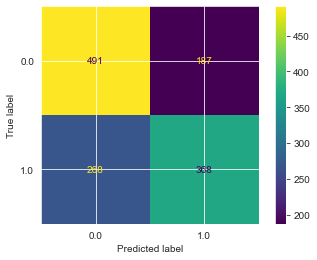

In [37]:
# Predicciones
predictions = regresion_logistica.predict(X_test)

#Matriz de Confusión
print(confusion_matrix(y_test, predictions))

#Ploteamos la Matriz
plot_confusion_matrix(regresion_logistica, X_test, y_test)
plt.show()

Observaciones:
- Se mejoraron los valores del accuracy (3%) y recall (15%) pero de todas formas el modelo posee un alto valor de falsos positivos y negativos.

Accuracy of the classifier is: 0.6537290715372908
Precision Score of the classifier is: 0.6630630630630631
Recall Score of the classifier is: 0.5786163522012578
F1 Score of the classifier is: 0.6179680940386231
AUC for our classifier is: 0.7115081352850596


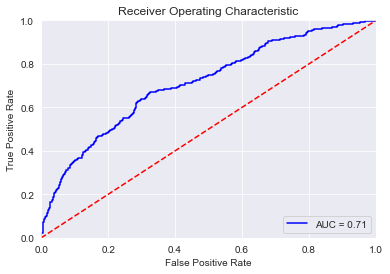

In [35]:
# Accuracy
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")

# Precision
from sklearn.metrics import precision_score
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

# Recall
from sklearn.metrics import recall_score
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Calculo del F1 score
from sklearn.metrics import f1_score
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

#Template CURVA - ROC

from sklearn.metrics import roc_curve, auc

class_probabilities = regresion_logistica.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observaciones:
- El modelo predice en un 65,2% de los casos si el precio de BTC sube o baja.